# Data preprocessing

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #To analyse the missing data with heatmap. 

## Import Data 

In [2]:
loan_data = pd.read_csv('loan_data_2007_2014.csv')

/Users/graystone/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data_backup = loan_data.copy() #Backup the orgiinal file, if we make any mistakes, we can re-start with fresh copies

## Explore Data

In [4]:
pd.options.display.max_columns = None # To ensure we can see all the columns
loan_data.drop('Unnamed: 0', axis=1, inplace=True) # Delete unwanted column
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,19.85,0.0,Apr-03,2.0,NaN,NaN,18.0,0.0,23208,77.6,36.0,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.0,0.0,0.0,Jan-16,432.64,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,294998.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),10+ years,MORTGAGE,78000.0,Verified,Jan-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,377xx,TN,18.45,0.0,Jun-97,5.0,NaN,116.0,18.0,1.0,18238,46.3,30.0,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.0,0.0,0.0,Dec-14,17.50,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,221830.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,7 years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/06/13 > I am going to c...,debt_consolidation,Debt consolidation,458xx,OH,25.65,0.0,Dec-01,2.0,65.0,NaN,18.0,0.0,6688,51.1,43.0,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.0,0.0,0.0,Jan-16,514.34,Feb-16,Dec-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,73598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,3 years,OWN,83000.0,Verified,Jan-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,913xx,CA,5.39,3.0,Feb-03,1.0,13.0,NaN,21.0,0.0,11404,21.5,27.0,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.0,0.0,0.0,Dec-14,1500.68,NaN,Apr-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,591610.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,D3,NaN,10+ years,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/04/13 > I will like a l...,other,Other,950xx,CA,22.78,1.0,Feb-00,0.0,9.0,NaN,6.0,0.0,11325,70.8,22.0,f,3984.38,3974.41,8821.620000,8799.57,6015.62,2806.00,0.0,0.0,0.0,Jan-16,367.58,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,57477.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [6]:
loan_data.shape

(466285, 74)

We have 4 666 285 individual loan files in the dataset with 74 features. Let's check the datatypes of each column (feature): 

In [7]:
loan_data.info() #We probaly need to change some of the dataypes in order to utilise them in our models

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

The following heatmap helps us easily understand how much missing data we have in our dataset. Yellow indicates the missing data.
Looks like some columns are totally empty. For example 'open_rv_12m'	'open_rv_24m'	'max_bal_bc' or 'all_util'

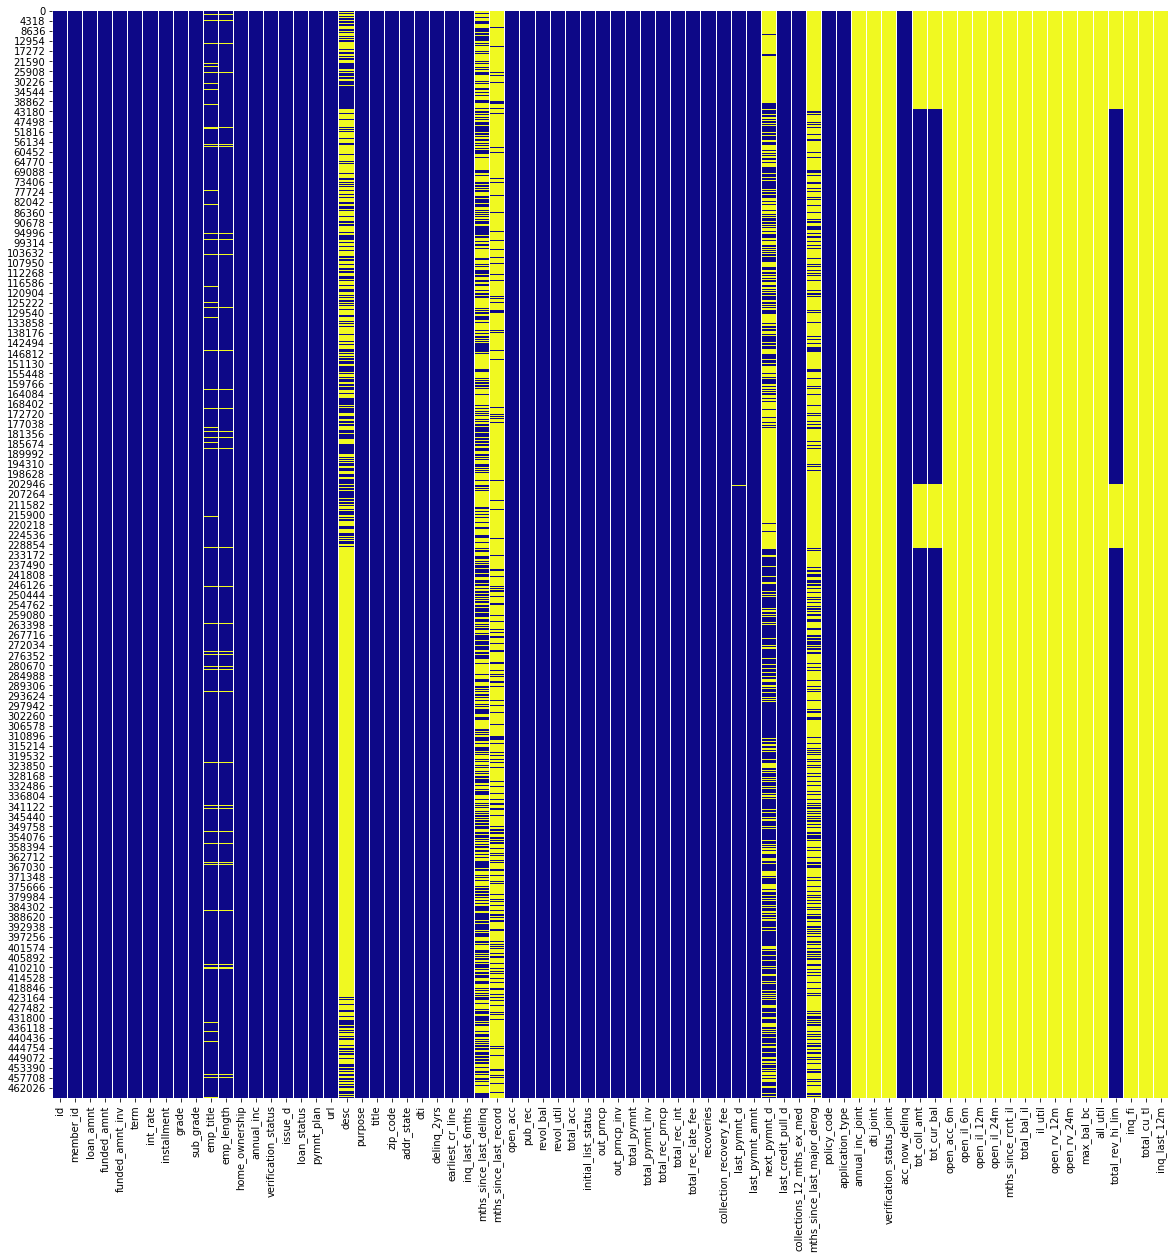

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.isnull(), cbar=False, cmap='plasma')

## General Preporcessing

### Preprocessing few continuous variables

#### Employment lenght

In [9]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

We should turn these into integers. 

In [10]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',  str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')

In [11]:
import sys
print(type(loan_data['emp_length_int'][0]))
print(sys.getsizeof(loan_data['emp_length_int'][0]))

<class 'str'>
51


In [12]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
print(type(loan_data['emp_length_int'][0]))
print(loan_data['emp_length_int'][0])
loan_data['emp_length_int'].unique()

<class 'numpy.float64'>
10.0


array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

#### Earlies credit line

In [13]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [14]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [15]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [17]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [18]:
loan_data['mths_since_earliest_cr_line'].describe() #locate if there is any issue with the data (looks like we have negative values?)

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [19]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


Issue here that pandas recognised 1962 as 2062 etc. It doesn't worth to start to transform 1169 rows one by one. We can only assume (since these are very old application dates) that we can use the maximum month for each items here.  

In [20]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        242.385374
std          86.460310
min          73.000000
25%         184.000000
50%         226.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

Now the minimum is not negative! 

#### Term of the loans (in months)

In [22]:
loan_data['term'] # we need to lose the "months" from thsi colum in order to turn it into integers.

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
466280     60 months
466281     60 months
466282     60 months
466283     36 months
466284     36 months
Name: term, Length: 466285, dtype: object

In [23]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [24]:
loan_data['term_int'] = loan_data['term'].str.replace('months', '')

In [25]:
loan_data['term_int']= pd.to_numeric(loan_data['term_int'])
type(loan_data['term_int'][0])

numpy.int64

In [26]:
loan_data['term_int'].unique()

array([36, 60])

#### Date of issue

In [27]:
loan_data['issue_d'] # this still shows up as object

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [28]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [29]:
loan_data['issue_d'].describe()

/Users/graystone/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                  466285
unique                     91
top       2014-10-01 00:00:00
freq                    38782
first     2007-06-01 00:00:00
last      2014-12-01 00:00:00
Name: issue_d, dtype: object

Let us also generate a new feature "Month since issue date", as above our presumed reference date is December 1st 2017 

In [30]:
loan_data['months_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d']) / np.timedelta64(1, 'M')))

In [31]:
loan_data['months_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: months_issue_d, dtype: float64

This data looks good. 

### Preprocessing few discrete variables

We have different options to preprocess discrete variables, for such scenarios like this, better to use the "dummy variable" transformation

In [32]:
print('Grade values are:', loan_data['grade'].unique())
print('Sub Grade values are:', loan_data['sub_grade'].unique())
print('Home ownership values are:', loan_data['home_ownership'].unique())
print('Verification Status values are:', loan_data['verification_status'].unique())
print('Loan status values are:', loan_data['loan_status'].unique())
print('Purpose values are:', loan_data['purpose'].unique())
print('Addr State values are:', loan_data['addr_state'].unique())
print('Initial List status values are:' ,loan_data['initial_list_status'].unique())

Grade values are: ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Sub Grade values are: ['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
Home ownership values are: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']
Verification Status values are: ['Verified' 'Source Verified' 'Not Verified']
Loan status values are: ['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)'
 'In Grace Period' 'Late (16-30 days)'
 'Does not meet the credit policy. Status:Fully Paid'
 'Does not meet the credit policy. Status:Charged Off']
Purpose values are: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
Addr State values are: ['AZ' 'GA' 'IL' 'CA' 'OR' 'NC' 'TX' 'VA' 'MO' 'CT' 'UT' 'FL' 'NY' 'PA'
 'MN' 'NJ' 'KY' 'OH' 'SC' 'RI' 'LA' 'MA' 'WA' 'WI' 'AL' 

Let's turn them into dummies

In [33]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep =' '),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade', prefix_sep =' '),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership', prefix_sep =' '),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status', prefix_sep =' '),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep =' '),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose', prefix_sep =' '),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state', prefix_sep =' '),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status', prefix_sep =' ')]

In [34]:
loan_data_dummies

[        grade A  grade B  grade C  grade D  grade E  grade F  grade G
 0             0        1        0        0        0        0        0
 1             0        0        1        0        0        0        0
 2             0        0        1        0        0        0        0
 3             0        0        1        0        0        0        0
 4             0        1        0        0        0        0        0
 ...         ...      ...      ...      ...      ...      ...      ...
 466280        0        0        1        0        0        0        0
 466281        0        0        0        1        0        0        0
 466282        0        0        0        1        0        0        0
 466283        1        0        0        0        0        0        0
 466284        0        0        0        1        0        0        0
 
 [466285 rows x 7 columns],
         sub_grade A1  sub_grade A2  sub_grade A3  sub_grade A4  sub_grade A5  \
 0                  0             0  

In [36]:
loan_data_dummies = pd.concat(loan_data_dummies, axis=1)

In [37]:
loan_data_dummies.head()

,grade A,grade B,grade C,grade D,grade E,grade F,grade G,sub_grade A1,sub_grade A2,sub_grade A3,sub_grade A4,sub_grade A5,sub_grade B1,sub_grade B2,sub_grade B3,sub_grade B4,sub_grade B5,sub_grade C1,sub_grade C2,sub_grade C3,sub_grade C4,sub_grade C5,sub_grade D1,sub_grade D2,sub_grade D3,sub_grade D4,sub_grade D5,sub_grade E1,sub_grade E2,sub_grade E3,sub_grade E4,sub_grade E5,sub_grade F1,sub_grade F2,sub_grade F3,sub_grade F4,sub_grade F5,sub_grade G1,sub_grade G2,sub_grade G3,sub_grade G4,sub_grade G5,home_ownership ANY,home_ownership MORTGAGE,home_ownership NONE,home_ownership OTHER,home_ownership OWN,home_ownership RENT,verification_status Not Verified,verification_status Source Verified,verification_status Verified,loan_status Charged Off,loan_status Current,loan_status Default,loan_status Does not meet the credit policy. Status:Charged Off,loan_status Does not meet the credit policy. Status:Fully Paid,loan_status Fully Paid,loan_status In Grace Period,loan_status Late (16-30 days),loan_status Late (31-120 days),purpose car,purpose credit_card,purpose debt_consolidation,purpose educational,purpose home_improvement,purpose house,purpose major_purchase,purpose medical,purpose moving,purpose other,purpose renewable_energy,purpose small_business,purpose vacation,purpose wedding,addr_state AK,addr_state AL,addr_state AR,addr_state AZ,addr_state CA,addr_state CO,addr_state CT,addr_state DC,addr_state DE,addr_state FL,addr_state GA,addr_state HI,addr_state IA,addr_state ID,addr_state IL,addr_state IN,addr_state KS,addr_state KY,addr_state LA,addr_state MA,addr_state MD,addr_state ME,addr_state MI,addr_state MN,addr_state MO,addr_state MS,addr_state MT,addr_state NC,addr_state NE,addr_state NH,addr_state NJ,addr_state NM,addr_state NV,addr_state NY,addr_state OH,addr_state OK,addr_state OR,addr_state PA,addr_state RI,addr_state SC,addr_state SD,addr_state TN,addr_state TX,addr_state UT,addr_state VA,addr_state VT,addr_state WA,addr_state WI,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [38]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,months_issue_d,grade A,grade B,grade C,grade D,grade E,grade F,grade G,sub_grade A1,sub_grade A2,sub_grade A3,sub_grade A4,sub_grade A5,sub_grade B1,sub_grade B2,sub_grade B3,sub_grade B4,sub_grade B5,sub_grade C1,sub_grade C2,sub_grade C3,sub_grade C4,sub_grade C5,sub_grade D1,sub_grade D2,sub_grade D3,sub_grade D4,sub_grade D5,sub_grade E1,sub_grade E2,sub_grade E3,sub_grade E4,sub_grade E5,sub_grade F1,sub_grade F2,sub_grade F3,sub_grade F4,sub_grade F5,sub_grade G1,sub_grade G2,sub_grade G3,sub_grade G4,sub_grade G5,home_ownership ANY,home_ownership MORTGAGE,home_ownership NONE,home_ownership OTHER,home_ownership OWN,home_ownership RENT,verification_status Not Verified,verification_status Source Verified,verification_status Verified,loan_status Charged Off,loan_status Current,loan_status Default,loan_status Does not meet the credit policy. Status:Charged Off,loan_status Does not meet the credit policy. Status:Fully Paid,loan_status Fully Paid,loan_status In Grace Period,loan_status Late (16-30 days),loan_status Late (31-120 days),purpose car,purpose credit_card,purpose debt_consolidation,purpose educational,purpose home_improvement,purpose house,purpose major_purchase,purpose medical,purpose moving,purpose other,purpose renewable_energy,purpose small_business,purpose vacation,purpose wedding,addr_state AK,addr_state AL,addr_state AR,addr_state AZ,addr_state CA,addr_state CO,addr_state CT,addr_state DC,addr_state DE,addr_state FL,addr_state GA,addr_state HI,addr_state IA,addr_state ID,addr_state IL,addr_state IN,addr_state KS,addr_state KY,addr_state LA,addr_state MA,addr_state MD,addr_state ME,addr_state MI,addr_state MN,addr_state MO,addr_state MS,addr_state MT,addr_state NC,addr_state NE,addr_state NH,addr_state NJ,addr_state NM,addr_state NV,addr_state NY,addr_state OH,addr_state OK,addr_state OR,addr_state PA,addr_state RI,addr_state SC,addr_state SD,addr_state TN,addr_state TX,addr_state UT,addr_state VA,addr_state VT,addr_state WA,addr_state WI,addr_state WV,addr_state WY,initial_list_status f,initial_list_status w
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,1985-01-01,395.0,36,72.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,https://

Great the dummy data are added to the our original dataset. 

#### Check and clean dataset

In [39]:
pd.options.display.max_rows = None # To ensure we can see all the rows
loan_data.isnull().sum()

id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                                                          0
annual_inc                            

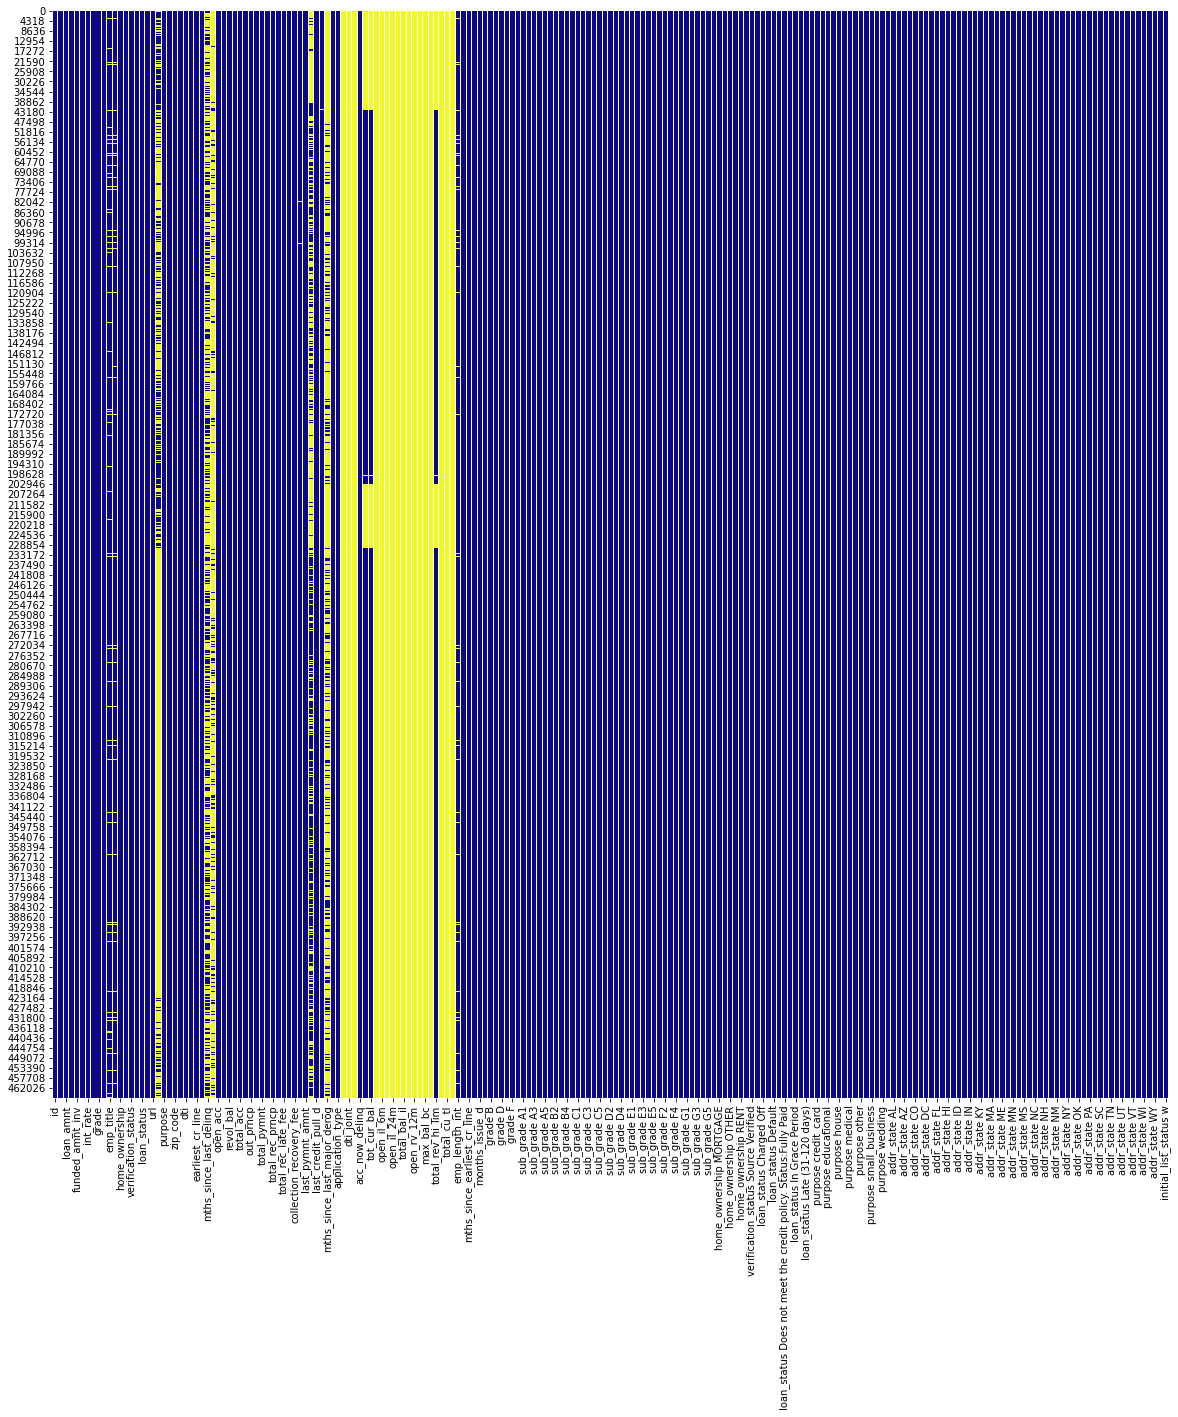

In [40]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.isnull(), cbar=False, cmap='plasma')

In [41]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0]

emp_title                       27588
emp_length                      21008
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m  

#### Means

In [44]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)

In [45]:
loan_data['annual_inc'].isnull().sum()

0

In [46]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

#### Zeros

For all of the following variables, we replaceed the missing values with zeroes:

‘mths_since_earliest_cr_line’

‘acc_now_delinq’

‘total_acc’

‘pub_rec’

‘open_acc’

‘inq_last_6mths’

‘delinq_2yrs’

‘emp_length_int’

In [47]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [48]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0]

emp_title                       27588
emp_length                      21008
desc                           340302
title                              20
earliest_cr_line                   29
mths_since_last_delinq         250351
mths_since_last_record         403647
revol_util                        340
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m                    466285
open_il_24m                    466285
mths_since_rcnt_il             466285
total_bal_il                   466285
il_util                        466285
open_rv_12m                    466285
open_rv_24m 

In [49]:
loan_data.drop('annual_inc_joint', axis=1, inplace = True)

In [51]:
loan_data.drop(['dti_joint', 'verification_status_joint'], axis=1, inplace = True)

In [55]:
columns = ['open_acc_6m','open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m','max_bal_bc', 'all_util', 'inq_fi','total_cu_tl', 'inq_last_12m']

In [56]:
loan_data.drop(columns, axis=1, inplace = True)

In [57]:
loan_data.isnull().sum()[loan_data.isnull().sum() > 0]

emp_title                       27588
emp_length                      21008
desc                           340302
title                              20
earliest_cr_line                   29
mths_since_last_delinq         250351
mths_since_last_record         403647
revol_util                        340
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
tot_coll_amt                    70276
tot_cur_bal                     70276
earliest_cr_line_date              29
dtype: int64

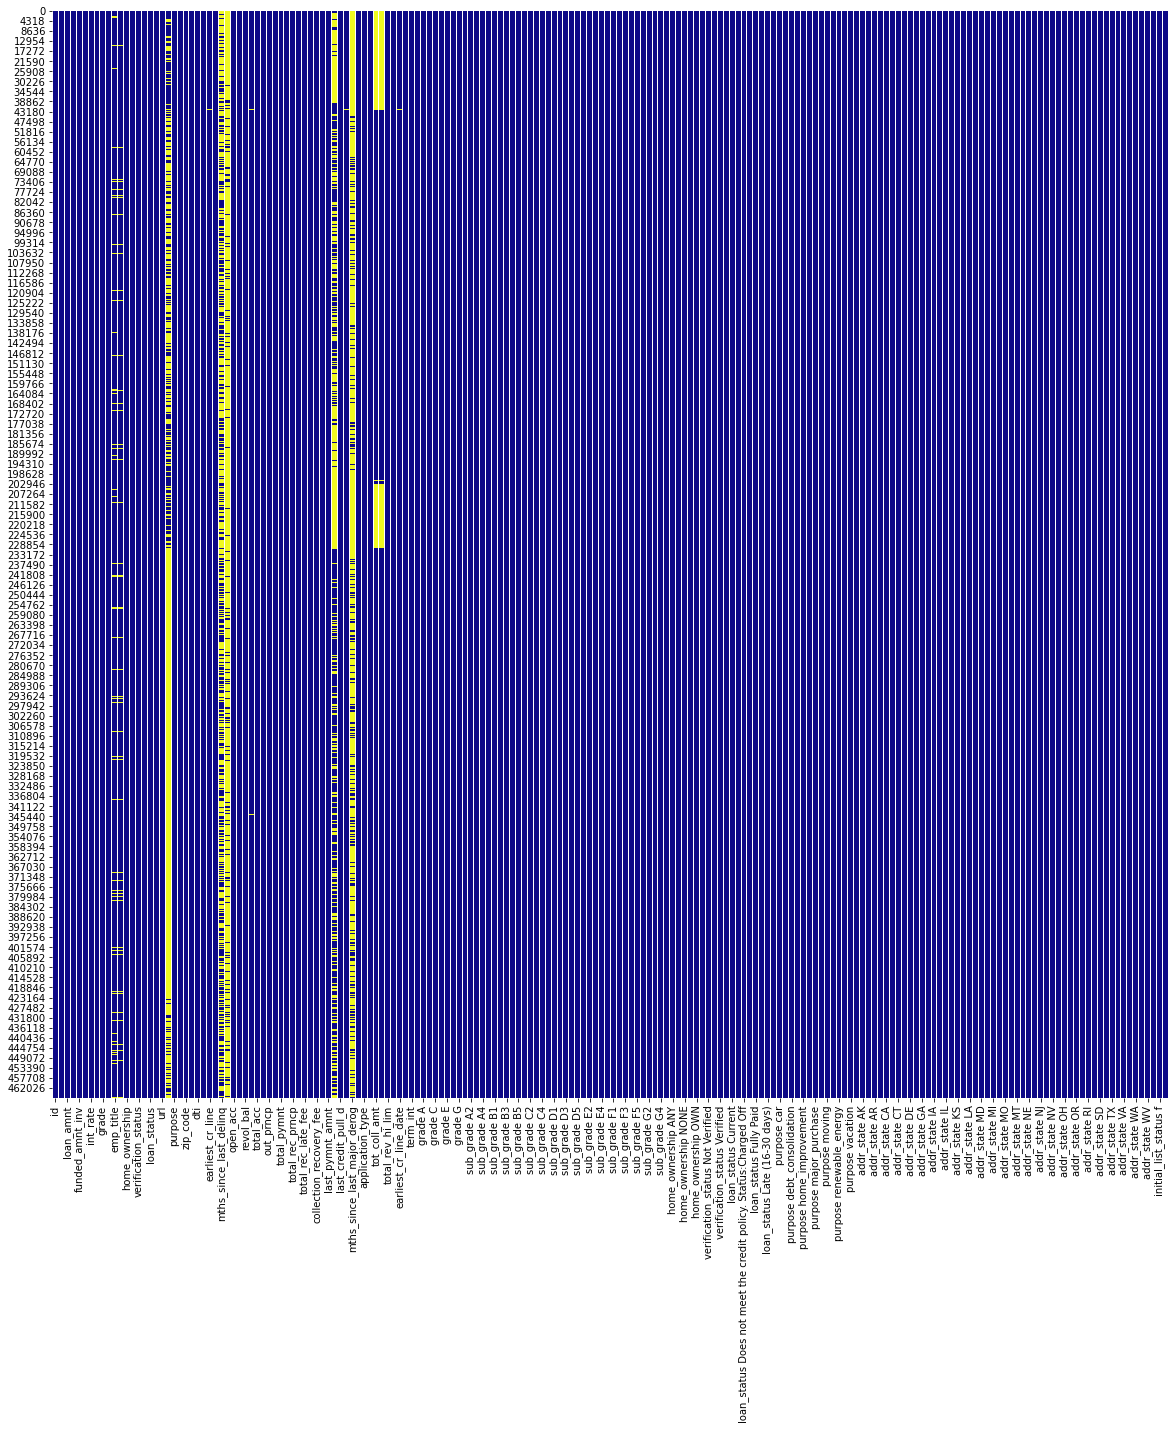

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.isnull(), cbar=False, cmap='plasma')

Looks way better (Yellow is the missing data)

### Save the results to CSV file 

In [60]:
loan_data.to_csv('loan_data_2007_2014_processed.csv')